In [1]:
import pandas as pd
import os

In [4]:
PAD = ['0']
CONV = ['30']
MODEL = ['conv'] 
SEED = [str(i) for i in range(1, 11)] + ['42']
DATA = ['yelp', 'sports']
ABLATE = [str(i) for i in range(0, 7)]

def load_data(PAD, CONV, MODEL, SEED, DATA, ABLATE):
    total_dict = {
        'HIT@1': [],
        'HIT@5': [],
        'HIT@10': [],
        'NDCG@1': [],
        'NDCG@5': [],
        'NDCG@10': [],
        'MRR': [],
        'conv': [],
        'pad': [],
        'data': [],
        'model': [],
        'seed': [],
        'ablate': []
    }

    for pad in PAD:
        for model in MODEL:
            for seed in SEED:
                for data in DATA:
                    for conv in CONV:
                        for ablate in ABLATE:
                            try:
                                _path = path.format(model=model,data=data,conv=conv,pad=pad,seed=seed,ablate=ablate)
                                with open(_path) as f:
                                    content = f.readlines()
                                    for line in content:
                                        if 'Test,' in line: # Test, Epoch:0, HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                                            break
                                    metrics = line.split('\n')[0].split('Epoch:0, ')[1].split(' ') # HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                                    for item in metrics:
                                        key, value = item.split(':')
                                        total_dict[key].append(float(value))
                                    total_dict['conv'].append(conv)
                                    total_dict['pad'].append(pad)
                                    total_dict['seed'].append(seed)
                                    total_dict['data'].append(data)
                                    total_dict['model'].append(model)
                                    total_dict['ablate'].append(ablate)
                            except:
                                print(f'error for {conv} {pad} {model} {data} {seed}')
    dataset = pd.DataFrame(total_dict)
    return dataset

In [5]:
dataset = load_data(PAD, CONV, MODEL, SEED, DATA, ABLATE)
dataset.groupby(['pad','conv', 'data', 'ablate']).mean().sort_values(by='ablate').round(4)

HIT@1   HIT@5  HIT@10  NDCG@1  NDCG@5  NDCG@10  \
pad conv data   ablate                                                    
0   30   sports 0       0.1671  0.3890  0.5116  0.1671  0.2819   0.3215   
         yelp   0       0.2816  0.6347  0.7863  0.2816  0.4653   0.5146   
         sports 1       0.1692  0.3907  0.5136  0.1692  0.2838   0.3235   
         yelp   1       0.2818  0.6357  0.7886  0.2818  0.4659   0.5156   
         sports 2       0.1431  0.3728  0.5107  0.1431  0.2610   0.3055   
         yelp   2       0.2189  0.5980  0.7829  0.2189  0.4138   0.4739   
         sports 3       0.1675  0.3895  0.5139  0.1675  0.2823   0.3225   
         yelp   3       0.2811  0.6328  0.7883  0.2811  0.4640   0.5145   
         sports 4       0.1232  0.3344  0.4701  0.1232  0.2311   0.2748   
         yelp   4       0.1927  0.5524  0.7460  0.1927  0.3768   0.4396   
         sports 5       0.1633  0.3792  0.5013  0.1633  0.2749   0.3143   
         yelp   5       0.2713  0.6237  0.7790  0.2713  0.4545   0.5050   
         sports 6       0.1648  0.3880  0.5133  0.1648  0.2801   0.3205   
         yelp   6       0.2818  0.6365  0.7926  0.2818  0.4665   0.5172   

                           MRR  
pad conv data   ablate          
0   30   sports 0       0.2808  
         yelp   0       0.4406  
         sports 1       0.2828  
         yelp   1       0.4413  
         sports 2       0.2614  
         yelp   2       0.3901  
         sports 3       0.2815  
         yelp   3       0.4402  
         sports 4       0.2352  
         yelp   4       0.3591  
         sports 5       0.2749  
         yelp   5       0.4309  
         sports 6       0.2792  
         yelp   6       0.4424

In [12]:
path = '/data/anonymous/seqrec/results2/search_{model}_{data}_2/search_search_{model}_{data}_2_act_0_convn_1_convs_{conv}_pad_{pad}_see_{seed}/log.log'
PAD = ['0', '1', '2']
CONV = ['3', '5', '10', '15', '20', '25', '30', '35', '40', '45', '50']
MODEL = ['conv'] 
SEED = [str(i) for i in range(1, 11)] + ['42']
DATA = ['beauty', 'yelp', 'sports']
# ABLATE = [str(i) for i in range(0, 7)]

def load_data(PAD, CONV, MODEL, SEED, DATA):
    total_dict = {
        'HIT@1': [],
        'HIT@5': [],
        'HIT@10': [],
        'NDCG@1': [],
        'NDCG@5': [],
        'NDCG@10': [],
        'MRR': [],
        'conv': [],
        'pad': [],
        'data': [],
        'model': [],
        'seed': [],
        'ablate': []
    }

    for pad in PAD:
        for model in MODEL:
            for seed in SEED:
                for data in DATA:
                    for conv in CONV:
                        try:
                            _path = path.format(model=model,data=data,conv=conv,pad=pad,seed=seed)
                            with open(_path) as f:
                                content = f.readlines()
                                for line in content:
                                    if 'Test,' in line: # Test, Epoch:0, HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                                        break
                                metrics = line.split('\n')[0].split('Epoch:0, ')[1].split(' ') # HIT@1:0.2232 HIT@5:0.5611 HIT@10:0.7340 NDCG@1:0.2232 NDCG@5:0.3970 NDCG@5:0.4531 MRR:0.3798
                                for item in metrics:
                                    key, value = item.split(':')
                                    total_dict[key].append(float(value))
                                total_dict['conv'].append(conv)
                                total_dict['pad'].append(pad)
                                total_dict['seed'].append(seed)
                                total_dict['data'].append(data)
                                total_dict['model'].append(model)
                                total_dict['ablate'].append(ablate)
                        except:
                            print(f'error for {conv} {pad} {model} {data} {seed}')
    dataset = pd.DataFrame(total_dict)
    return dataset

In [13]:
dataset = load_data(PAD, CONV, MODEL, SEED, ['yelp'])

error for 40 0 conv yelp 2
error for 50 0 conv yelp 6
error for 30 1 conv yelp 4
error for 40 1 conv yelp 4
error for 10 1 conv yelp 6
error for 50 1 conv yelp 9
error for 3 2 conv yelp 3
error for 35 2 conv yelp 3


In [30]:
def plot(dataset, a, b, pdf_name='figure'):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib
    import pandas as pd
    from matplotlib.backends.backend_pdf import PdfPages
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    dataset['pad'] = dataset['pad'].replace(['0', '1', '2'], ['Circular', 'Reflect', 'Zero'])
    with PdfPages(f'{pdf_name}.pdf') as pdf:
        f = plt.figure(dpi=100, figsize=(8,7))
        f.subplots_adjust(top=0.9, left=0.1, right=0.9, bottom=0.2)
        style = ['darkgrid', 'dark', 'white', 'whitegrid', 'ticks']
        context = ['paper', 'notebook', 'talk', 'poster']
        palette = sns.color_palette('deep')
        sns.set_theme(style=style[4],
                context=context[0],
                font='Arial',
                font_scale=1.6,
                palette=[palette[0], palette[3], palette[2]] + palette[4:])
        f.add_subplot(2,2,1)
        sns.pointplot('conv', 'NDCG@5', 'pad', dataset, dodge=0.15, capsize=.2, ci=95, markers=['x','o','s']);
        # plt.legend([],[], frameon=False)
        plt.legend()
        plt.tight_layout()
        plt.xlabel(f'K \n ({a})')
        plt.ylabel('NDCG@5')

        f.add_subplot(2,2,2)
        sns.pointplot('conv', 'MRR', 'pad', dataset, dodge=0.15, capsize=.2, ci=95, markers=['x','o','s']);
        # plt.legend([],[], frameon=False)
        plt.legend()
        plt.tight_layout()
        plt.xlabel(f'K \n ({b})')
        plt.ylabel('MRR')
        pdf.savefig(f)
        # plt.close()

error for 40 0 conv yelp 2
error for 50 0 conv yelp 6
error for 30 1 conv yelp 4
error for 40 1 conv yelp 4
error for 10 1 conv yelp 6
error for 50 1 conv yelp 9
error for 3 2 conv yelp 3
error for 35 2 conv yelp 3


/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.2980392156862745, 0.4470588235294118, 0.6901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments 

error for 35 0 conv toys 5
error for 40 0 conv toys 9
error for 20 0 conv toys 10
error for 5 0 conv toys 42
error for 45 1 conv toys 4
error for 40 1 conv toys 5
error for 45 2 conv toys 9


/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.2980392156862745, 0.4470588235294118, 0.6901960784313725)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/home/anonymous/miniconda3/envs/pot/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, hue, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments 

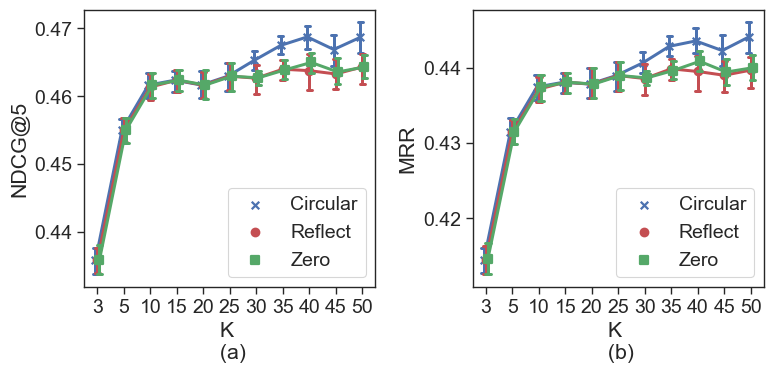

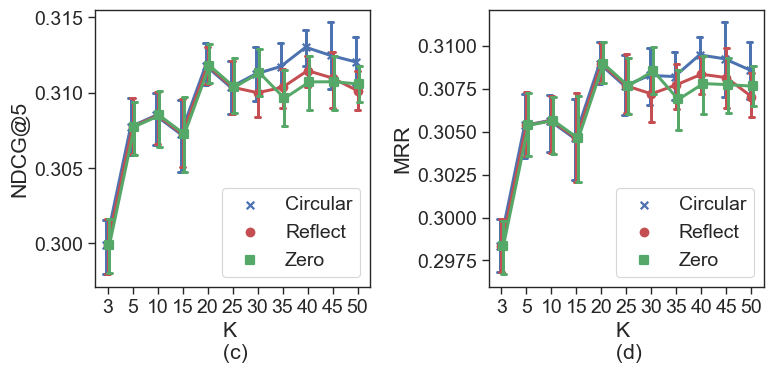

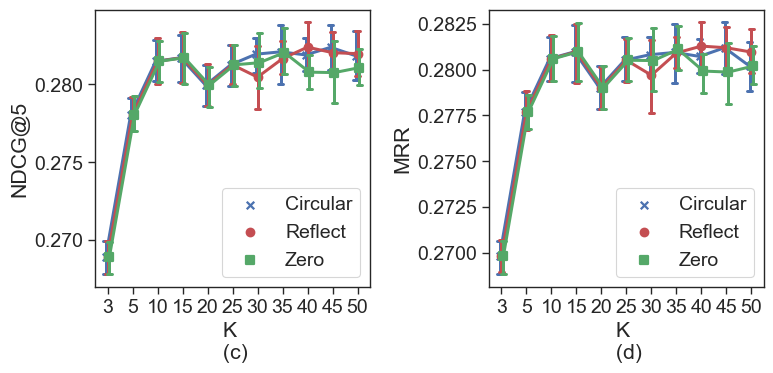

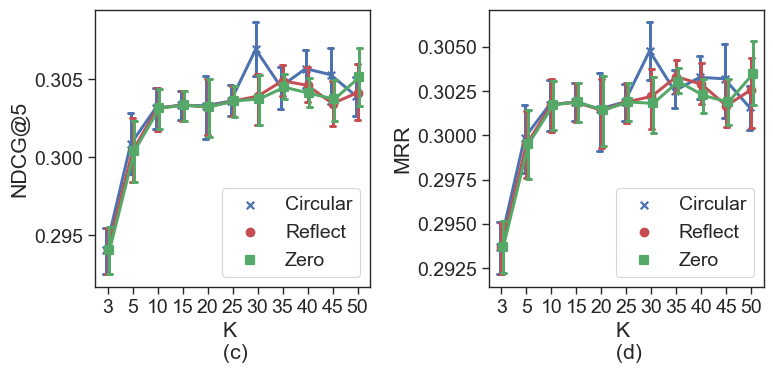

In [31]:
dataset = load_data(PAD, CONV, MODEL, SEED, ['yelp'])
_dataset = dataset
plot(_dataset, 'a', 'b', 'param_yelp')
dataset = load_data(PAD, CONV, MODEL, SEED, ['beauty'])
_dataset = dataset
plot(_dataset, 'c', 'd', 'param_beauty')
dataset = load_data(PAD, CONV, MODEL, SEED, ['sports'])
_dataset=dataset
plot(_dataset, 'c', 'd', 'param_sports')
dataset = load_data(PAD, CONV, MODEL, SEED, ['toys'])
_dataset=dataset
plot(_dataset, 'c', 'd', 'param_toys')